# Load raster data via WMS

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from datetime import datetime

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          75eb77b3-f3f2-42d9-8d6b-11b4253b77d8
Session valid until: 2021-08-31T15:56:34.600750383Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "dataset": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

8df9b0e6-e4b4-586e-90a3-6cf0f08c4e62

## Query raster via WMS

<GeoAxesSubplot:>

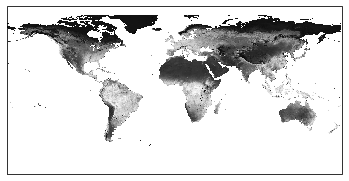

In [5]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.plot_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time]
        )
)

## Query as image with colorizer option

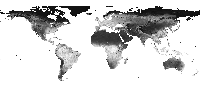

In [6]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    colorizer_min_max=(0, 255)
)

## Query dataframe of point data

In [7]:
ports = ge.register_workflow({
    "type": "Vector",
    "operator": {
        "type": "OgrSource",
        "params": {
            "dataset": {
                "type": "internal",
                "datasetId": "a9623a5b-b6c5-404b-bc5a-313ff72e4e75"
            },
            "attributeProjection": None
        }
    }
})

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

df = ports.get_dataframe(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time]
        )
)

df.head()

natlscale featurecla                          name  \
0        5.0       Port                 Sint Nicolaas   
1        5.0       Port                       Campana   
2        5.0       Port                        Zarate   
3        5.0       Port  Puerto Belgrano/Bahia Blanca   
4        5.0       Port    Puerto Galvan/Bahia Blanca   

                           website  scalerank                     geometry  \
0  www.rocargo.com/SanNicolas.html          8   POINT (-69.92356 12.43750)   
1      www.consejoportuario.com.ar          8  POINT (-58.95141 -34.15333)   
2      www.consejoportuario.com.ar          8  POINT (-59.00495 -34.09889)   
3                             None          8  POINT (-62.10088 -38.89444)   
4                             None          8  POINT (-62.30053 -38.78306)   

  start end  
0   NaT NaT  
1   NaT NaT  
2   NaT NaT  
3   NaT NaT  
4   NaT NaT

## Query whole world and combine with points

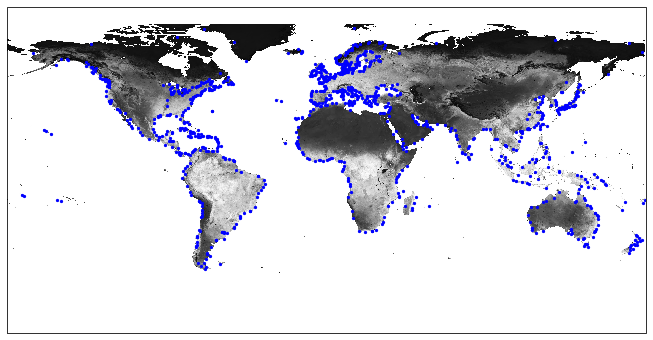

In [8]:
plt.figure(figsize=(12, 6))
plt.axes(projection=ccrs.PlateCarree())

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

ax = workflow.plot_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time]
        ),
    ax=plt.gca()
)

df.plot(markersize=5, marker='o', color='blue', ax=ax)

plt.show()

## Query part of the world and combine with points

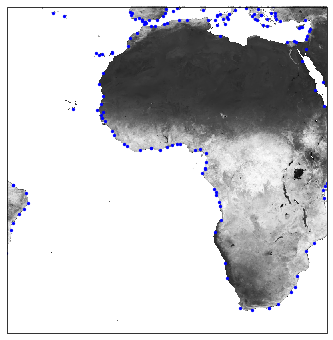

In [9]:
plt.figure(figsize=(12, 6))
plt.axes(projection=ccrs.PlateCarree())

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

ax = workflow.plot_image(
    ge.QueryRectangle(
        [-40.0, -40.0, 40.0, 40.0],
        [time, time]
        ),
    ax=plt.gca()
)

df.plot(markersize=5, marker='o', color='blue', ax=ax)

plt.show()